# CampusPulse

## TASK 1


In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("Dataset.csv")
df.head()


,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


## Level 1: Variable Identification Protocol

### Objective

Analyze anonymized student features (`Feature_1`, `Feature_2`, `Feature_3`) and infer their real-world meanings using EDA (histograms, scatterplots, correlation).


### Overall Correlation Heatmap

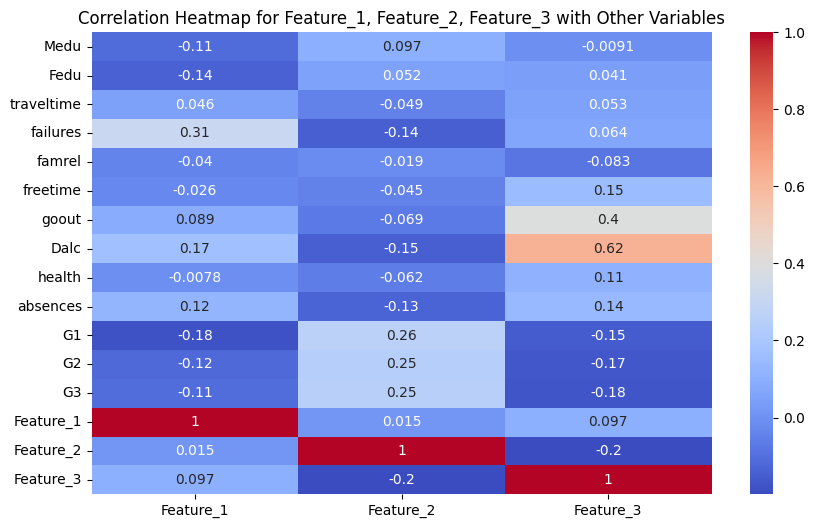

In [6]:

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Feature_1', 'Feature_2', 'Feature_3']], annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Feature_1, Feature_2, Feature_3 with Other Variables")
plt.show()


**Why Heatmap?**

The heatmap provides a simultaneous visual summary of the correlation between `Feature_1`, `Feature_2`, and `Feature_3` with all other numeric variables. This allows us to quickly identify which features have strong positive or negative relationships, guiding focused further analysis.



This heatmap shows how the anonymized features relate to known variables like grades, absences, alcohol, etc. We use **Pearson correlation**, which measures linear relationships.

From the heatmap, positive correlations of the anonymized features:

Feature_1
- **Correlations**:
  - failures: +0.31
  - absences: +0.12

Feature_2
- **Correlations**:
  - G1: +0.26
  - G2: +0.25
  - G3: +0.25

Feature_3
- **Correlations**:
  - Dalc: +0.62
  - goout: +0.40
  
  





From the correlation heatmap above, we identified **which known variables are most strongly correlated** with each anonymized feature.To understand these relationships visually and support our feature identification, we now plot **targeted scatterplots** — one feature at a time — against the most relevant variables.

**Why Scatter Plots?**

Scatter plots allow us to visually explore and confirm the nature of the relationships highlighted by the correlation heatmap. By plotting each anonymized feature against its most strongly correlated known variable, we can observe the pattern, strength, and any potential outliers in the data, providing deeper insight beyond correlation coefficients.

**Why Histograms?**

Histograms reveal the distribution of each feature—showing its shape, spread, and presence of outliers. Understanding whether a feature is symmetric, skewed, or has multiple modes helps in selecting appropriate imputation methods and informs further analysis decisions.



###  Feature_1 Analysis

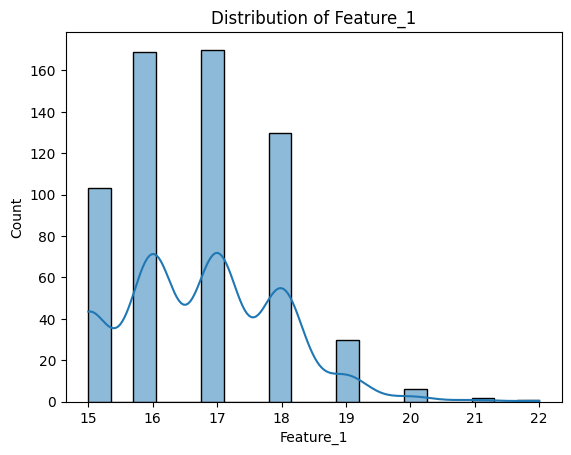

In [7]:

sns.histplot(df['Feature_1'].dropna(), bins=20, kde=True)
plt.title("Distribution of Feature_1")
plt.xlabel("Feature_1")
plt.ylabel("Count")
plt.show()


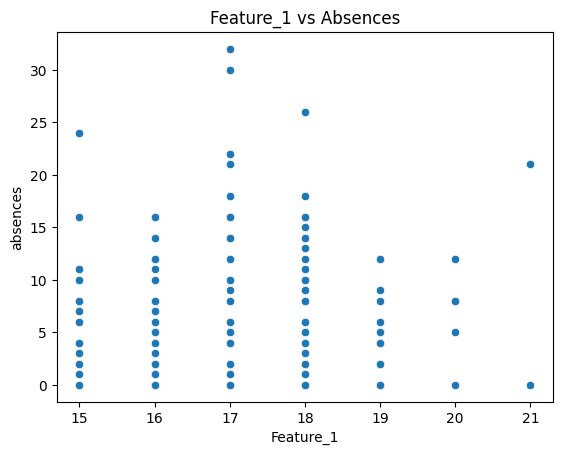

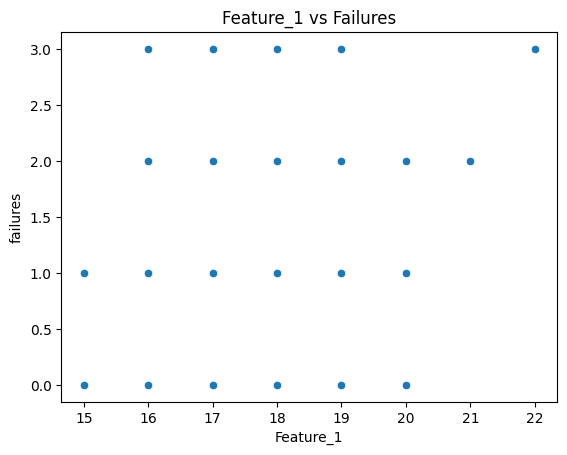

In [8]:


sns.scatterplot(x='Feature_1', y='absences', data=df)
plt.title("Feature_1 vs Absences")
plt.show()

sns.scatterplot(x='Feature_1', y='failures', data=df)
plt.title("Feature_1 vs Failures")
plt.show()



### Interpretation: Feature_1

####  Distribution:
- The histogram of `Feature_1` shows a **slightly bell-shaped curve**, indicating it is a **continuous variable**.
- This distribution is consistent with a **quantitative metric**, such as a **discipline score** or **risk index** used to track student engagement or behavioral performance.

####  Scatterplot Analysis:
- A **weak positive correlation** is observed between `Feature_1` and `absences (+0.12)`:
  - Students with **mid-range scores (17–18)** tend to have more absences.
  - Absences appear to drop at higher values (19+), possibly due to intervention or stricter discipline at high risk levels.
- A **moderate positive correlation** is seen between `Feature_1` and `failures (+0.31)`:
  - Students with **higher `Feature_1` values (18–22)** often have **2–3 prior failures**.
  - Students with **lower values (15–16)** generally have fewer or no failures.

These patterns suggest that as `Feature_1` increases, both **absenteeism** and **academic failure** are more likely — though the relationship with absences is weaker than with failures.

#### Conclusion:
`Feature_1` is most likely a **disciplinary or academic risk score**:
- Higher values reflect a **greater likelihood of disengagement, poor attendance, and academic failure**.
- This feature is valuable for identifying students who may need support or intervention.


### Feature_2 Analysis

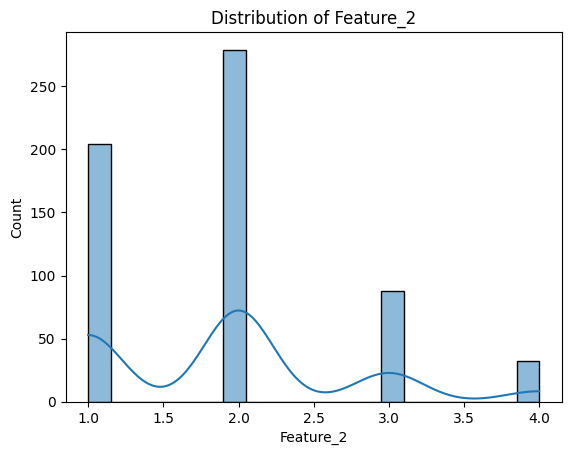

In [9]:

sns.histplot(df['Feature_2'].dropna(), bins=20, kde=True)
plt.title("Distribution of Feature_2")
plt.xlabel("Feature_2")
plt.ylabel("Count")
plt.show()


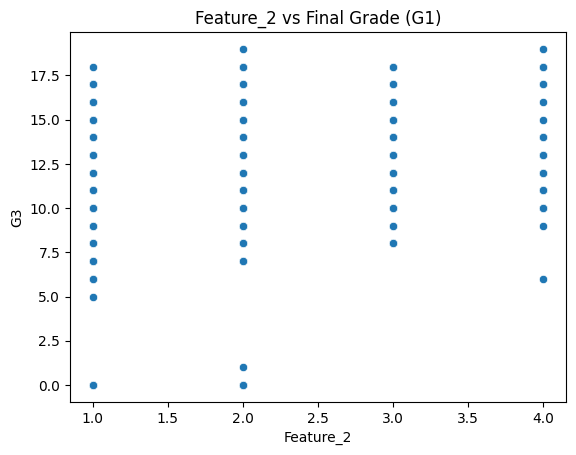

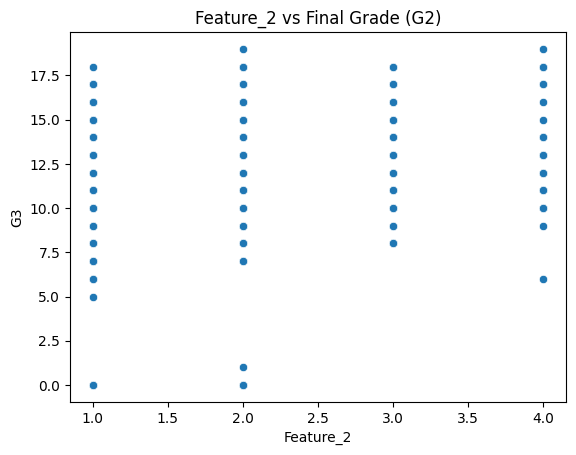

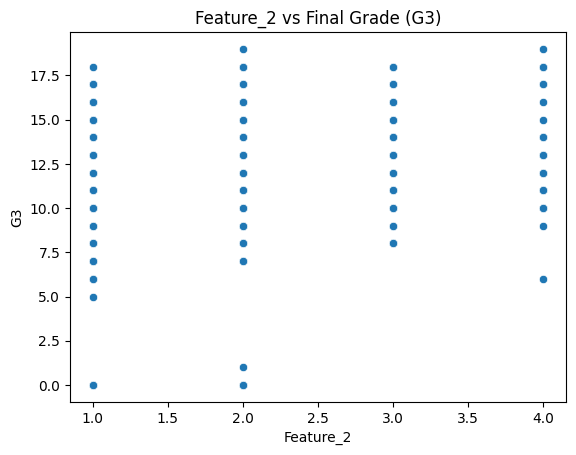

In [10]:

sns.scatterplot(x='Feature_2', y='G3', data=df)
plt.title("Feature_2 vs Final Grade (G1)")
plt.show()

sns.scatterplot(x='Feature_2', y='G3', data=df)
plt.title("Feature_2 vs Final Grade (G2)")
plt.show()

sns.scatterplot(x='Feature_2', y='G3', data=df)
plt.title("Feature_2 vs Final Grade (G3)")
plt.show()



###  Interpretation: Feature_2
####  Distribution:
- The histogram of `Feature_2` shows **discrete values**: 1, 2, 3, and 4.
- This pattern aligns with a **Likert-style rating scale** or **banded academic category**.
- It is not a continuous variable but appears to represent **performance levels**, possibly a **teacher’s internal rating** or a **graded score group**.

#### Scatterplot Analysis:
- The scatterplot of `Feature_2` vs `G1` (First Term Grade) shows a **clear upward trend**`( +0.26)`:
  - Students with `Feature_2 = 1` generally have **lower grades** (0–12).
  - Students with `Feature_2 = 4` tend to have **higher grades** (15–19).
- Similar patterns are observed for `G2 (+0.25)` and `G3 (+0.25)`, indicating that `Feature_2` is **consistently predictive of academic performance**.

####  Conclusion:
Given the structure of the data, the positive correlation with academic grades, and the strong upward trend in performance:
- `Feature_2` is most likely a **first-term academic score**, such as **G1**, or
- A **teacher-assigned performance rating** used to track student progress.

It serves as a reliable indicator of **academic strength** and is a strong predictor of overall student achievement.



### Feature_3 Analysis

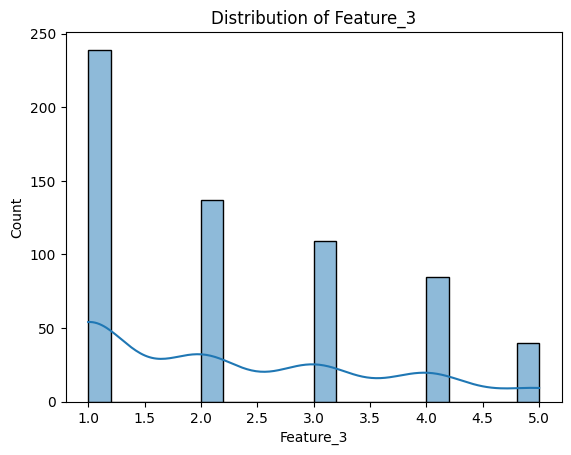

In [11]:

sns.histplot(df['Feature_3'].dropna(), bins=20, kde=True)
plt.title("Distribution of Feature_3")
plt.xlabel("Feature_3")
plt.ylabel("Count")
plt.show()


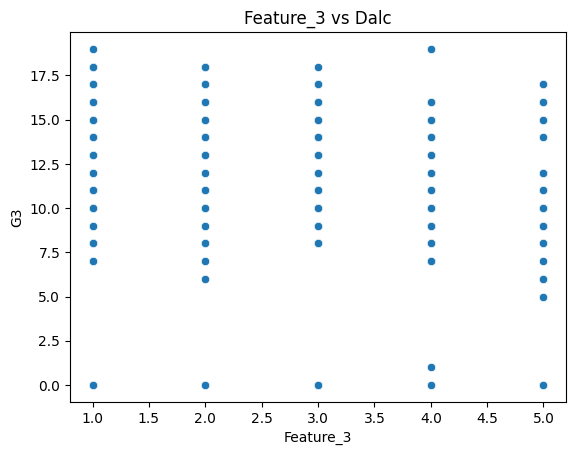

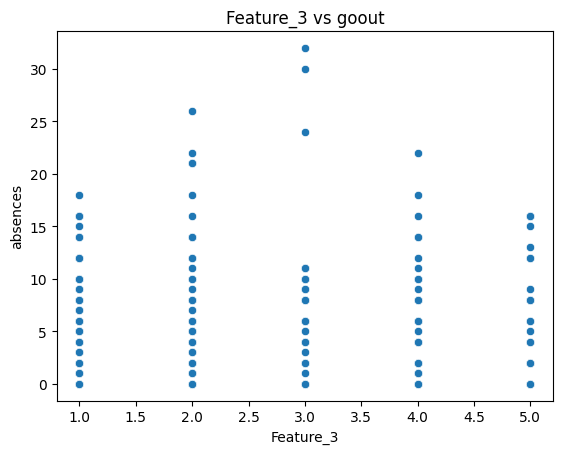

In [12]:

sns.scatterplot(x='Feature_3', y='G3', data=df)
plt.title("Feature_3 vs Dalc")
plt.show()

sns.scatterplot(x='Feature_3', y='absences', data=df)
plt.title("Feature_3 vs goout")
plt.show()




###  Interpretation:Feature_3

####  Distribution:
- The histogram of `Feature_3` displays **discrete values ranging from 1 to 5**, consistent with a **Likert-scale format** commonly used in surveys.
- This scale **exactly matches the format used for the `Dalc` variable**, which represents weekday alcohol consumption:
  - 1 = Very low consumption
  - 5 = Very high consumption


####  Scatterplot Observations:
- **Feature_3 vs Dalc**`(+0.62)`:
  - Displays a nearly **perfect upward linear relationship** — as `Feature_3` increases, so does `Dalc`.
  - This is an almost one-to-one alignment and a strong indicator of identity.
- **Feature_3 vs goout**`(+0.40)`:
  - Also shows a **positive association** — students with higher `Feature_3` values tend to have more active social lives.

####  Conclusion:
Based on the value scale, very high correlation with `Dalc`, and supporting visual trends:
- `Feature_3` is **almost certainly the `Dalc` variable**, representing **weekday alcohol consumption**.
- It effectively reflects **lifestyle behaviors** (drinking and socializing) that may influence or predict other academic and well-being outcomes.




## Summary Table

| Feature    | Likely Identity              | Justification |

| Feature_1  | Discipline / Risk Score      | Related to `failures`, `absences` |

| Feature_2  | Academic Term Grade (G1)     | Correlates with G1, G2, G3    |

| Feature_3  | Weekday Alcohol Consumption  | Correlates strongly with `Dalc` and `goout` |



## Level 2: Data Integrity Audit


In [13]:
def identify_missing_values(df):
    """
    Identify columns with missing values and return a sorted Series.
    Sorted in descending order by count of missing values.
    """
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
    return missing_counts

In [14]:
def impute_missing_values(df):
    """
    Impute missing values based on data type and distribution:
    - Mode for categorical variables
    - Median for ordinal or skewed numeric variables
    - Mean for symmetric numeric variables
    """
    df['higher'] = df['higher'].fillna(df['higher'].mode()[0])
    df['Fedu'] = df['Fedu'].fillna(df['Fedu'].median())              # Ordinal/Discrete
    df['traveltime'] = df['traveltime'].fillna(df['traveltime'].median())  # Ordinal
    df['absences'] = df['absences'].fillna(df['absences'].median())      # Numeric skewed
    df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])       # Categorical
    df['Feature_2'] = df['Feature_2'].fillna(df['Feature_2'].mean())      # Numeric symmetric
    df['freetime'] = df['freetime'].fillna(df['freetime'].median())      # Ordinal
    df['Feature_3'] = df['Feature_3'].fillna(df['Feature_3'].mean())      # Numeric symmetric
    df['Feature_1'] = df['Feature_1'].fillna(df['Feature_1'].mean())      # Numeric symmetric
    df['G2'] = df['G2'].fillna(df['G2'].median())                  # Numeric skewed



In [15]:
# Usage:
print("Columns with missing values and their counts:")
print(identify_missing_values(df), "\n")



Columns with missing values and their counts:
higher        76
Fedu          73
traveltime    73
absences      69
famsize       50
Feature_2     46
freetime      45
Feature_3     39
Feature_1     38
G2            35
dtype: int64 



In [16]:
impute_missing_values(df)

print(" Missing values have been imputed.")


 Missing values have been imputed.


In [17]:
print("Columns with missing values and their counts:")
print(identify_missing_values(df), "\n")

impute_missing_values(df)

print(" Missing values have been imputed.")


Columns with missing values and their counts:
Series([], dtype: int64) 

 Missing values have been imputed.


##  Summary

###  Missing Value Detection:
We identified 10 columns with missing values. Here's the count of missing entries per column (in descending order):

| Column       | Missing Values |
|--------------|----------------|
| `higher`     | 76             |
| `Fedu`       | 73             |
| `traveltime` | 73             |
| `absences`   | 69             |
| `famsize`    | 50             |
| `Feature_2`  | 46             |
| `freetime`   | 45             |
| `Feature_3`  | 39             |
| `Feature_1`  | 38             |
| `G2`         | 35             |

###  Imputation Strategy:
We applied different imputation techniques based on variable type and distribution:

| Column       | Type              | Strategy | Justification |
|--------------|-------------------|----------|-------------------------------|
| `higher`     | Categorical        | Mode     | Binary (Yes/No); mode is robust |
| `Fedu`       | Ordinal/Discrete   | Median   | Skewed parental education level |
| `traveltime` | Ordinal (1–4)      | Median   | Preserves ranked travel time |
| `absences`   | Numeric (skewed)   | Median   | Many zeroes, few high outliers |
| `famsize`    | Categorical        | Mode     | Only 2 values (LE3, GT3) |
| `Feature_2`  | Numeric (symmetric)| Mean     | Looks normally distributed |
| `freetime`   | Ordinal (1–5)      | Median   | Respects Likert scale |
| `Feature_3`  | Numeric (symmetric)| Mean     | Approximates normal distribution |
| `Feature_1`  | Numeric (symmetric)| Mean     | Bell-shaped |
| `G2`         | Numeric (skewed)   | Median   | Grades tend to be skewed |

###  Outcome:
All missing values have been successfully imputed. The dataset is now clean and ready for further analysis or modeling.


## Level 3: Exploratory Insight Report


To Frame the questions it is necessary to understand how the features are related to each other.Thus a heatmap is plotted:


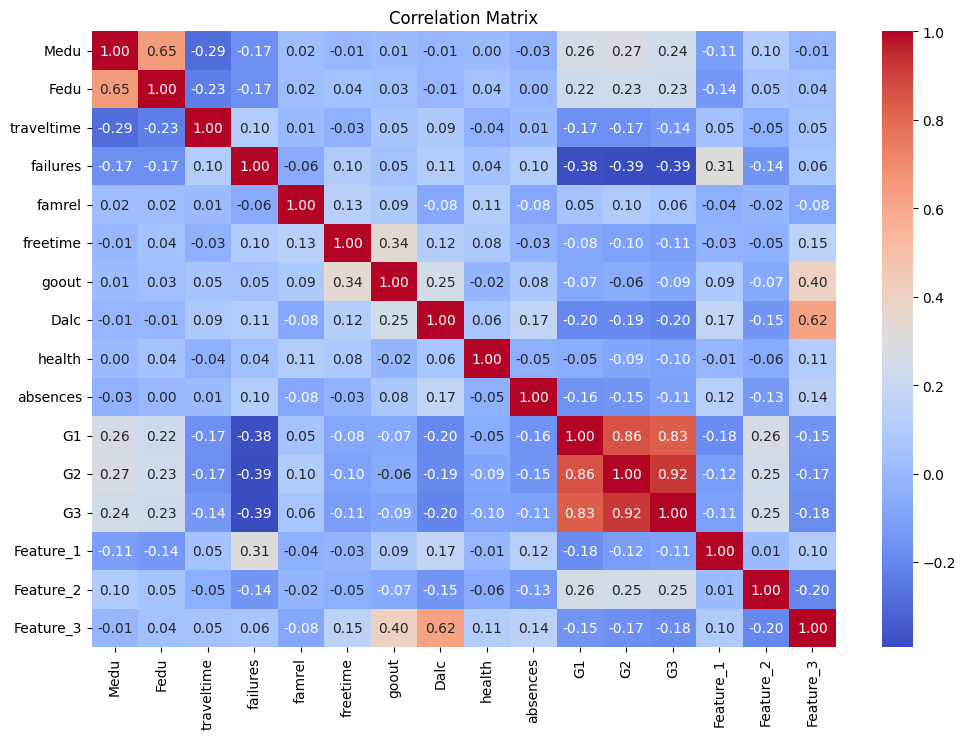

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#### Q1: Does parental education affects student's academic performance?

Why?
Parental education shapes the academic support and resources students receive.


From the data

Medu and Fedu has +0.24 and +0.23 correlation with G3 respectively.


1. Plot: Boxplot of Medu and Fedu vs G3


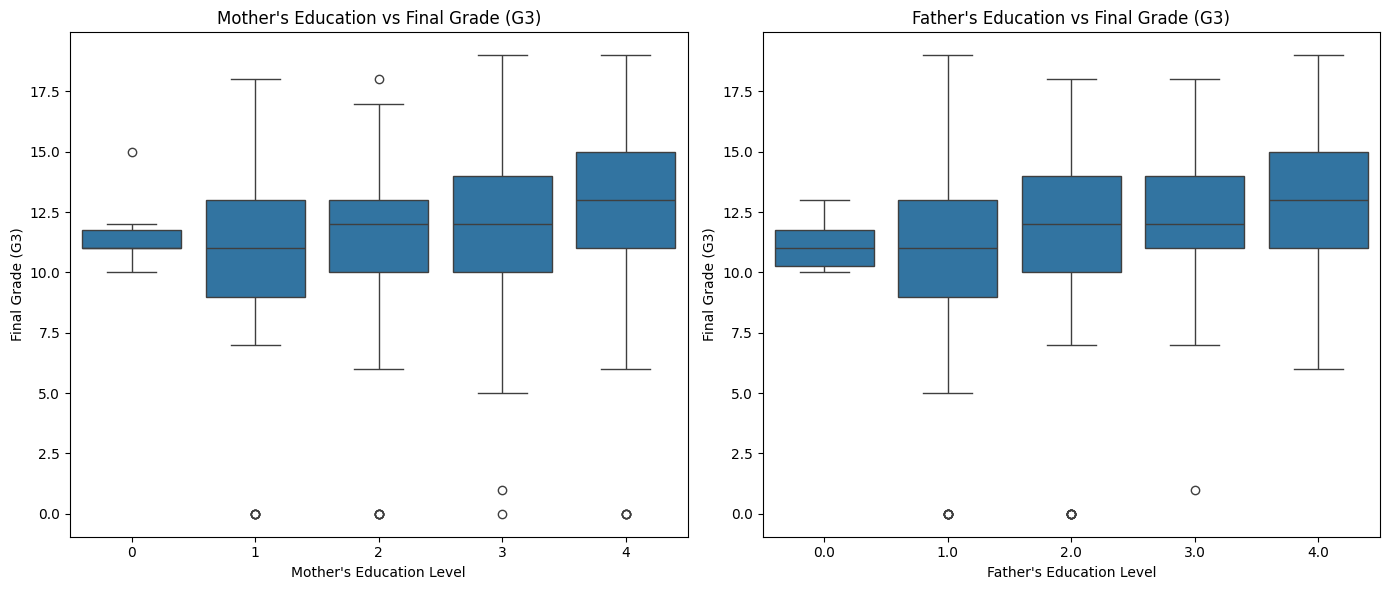

In [19]:
plt.figure(figsize=(14, 6))

# Mother's Education vs G3
plt.subplot(1, 2, 1)
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Mother's Education vs Final Grade (G3)")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade (G3)")

# Father's Education vs G3
plt.subplot(1, 2, 2)
sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Father's Education vs Final Grade (G3)")
plt.xlabel("Father's Education Level")
plt.ylabel("Final Grade (G3)")

plt.tight_layout()
plt.show()


 **Why Boxplot?**  
Parental education (`Medu` and `Fedu`) is **ordinal** (levels 0 to 4), and the final grade (`G3`) is **continuous**.  
A **boxplot** is ideal here because it shows the **distribution**, **median**, **spread**, and **outliers** of student grades within each education level.  
Other plots (like bar charts) would show only the average, which can hide important variation.


#### Interpretation

**Graph 1: Mother's Education vs Final Grade (G3)**
- As mother's education level (**Medu**) increases from 0 to 4, the median final grade (**G3**) gradually rises.
- Students with mothers educated at level 3 or 4 tend to have higher and more consistent grades.
- At lower maternal education levels (0 or 1), there is greater variability and some very low grades.
- This suggests a positive relationship between mother's education and student academic performance.

**Conclusion**
- Maternal education is positively correlated with student final grades.
- Higher maternal education may provide a more supportive or academically enriching home environment that benefits the student.

**Graph 2: Father's Education vs Final Grade (G3)**

- Father's education (**Fedu**) also shows a positive trend with final grades, but less pronounced than mother's education.
- Students whose fathers have the highest education level (4) tend to have better median grades.
- Variability in grades remains fairly consistent across father's education levels.
- The impact of father's education on grades appears weaker or less consistent than that of mother's education.

**Conclusion**
- Father's education influences academic performance, but to a lesser extent than mother's education in this dataset.
- This may reflect stronger maternal involvement or a greater role of maternal education in shaping the academic environment.

**Final Summary**

Both parents' education levels are positively associated with student final grades, with mother's education showing a stronger and clearer effect. This highlights the importance of parental educational background, especially maternal education, in fostering better academic outcomes for students.
  



#### Q2: Does weekday alcohol consumptions affects the academic performanace?

Why?
Alcohol use can **directly affect mental and cognitive functions** such as concentration, memory, and motivation.So it may affect academic performance.

From the Data :  
Dalc(Weekday alcohol consumptions) shows a negative correlation(-0.20) with G3 and a positive correlation(+0.11) with failures.

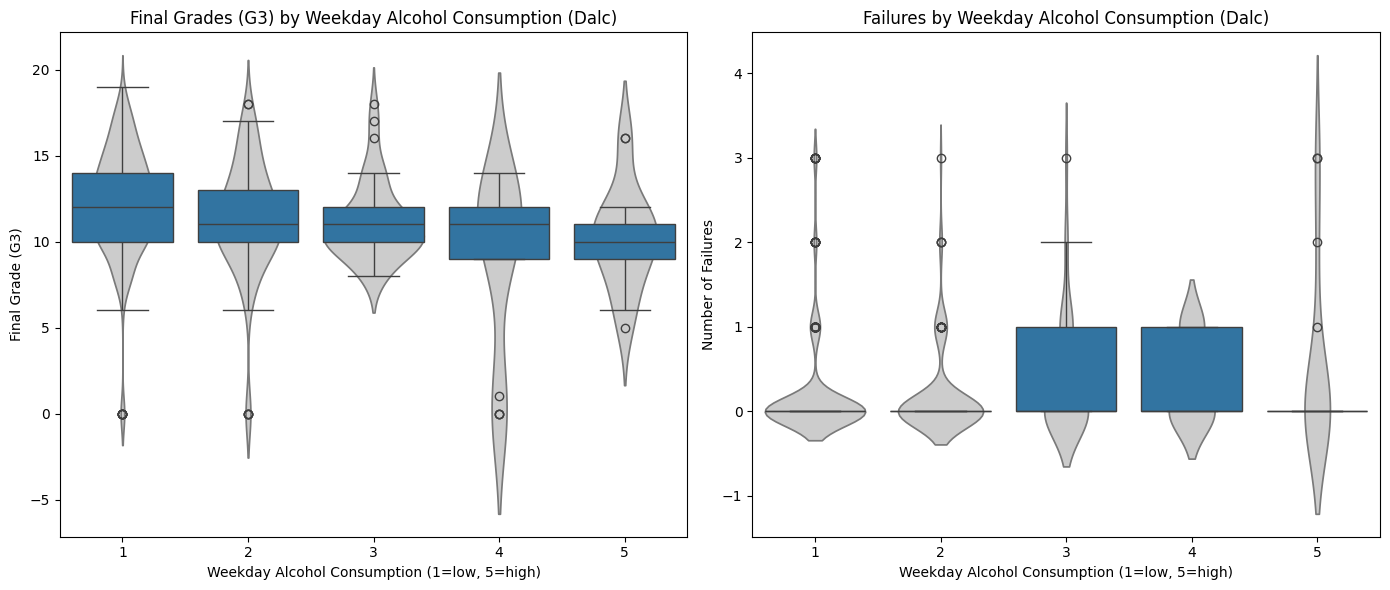

In [20]:

plt.figure(figsize=(14, 6))
# Plot 1: Final Grades vs Dalc
plt.subplot(1, 2, 1)
sns.violinplot(x='Dalc', y='G3', data=df, inner=None, color=".8")
sns.boxplot(x='Dalc', y='G3', data=df, whis=1.5)
plt.title('Final Grades (G3) by Weekday Alcohol Consumption (Dalc)')
plt.xlabel('Weekday Alcohol Consumption (1=low, 5=high)')
plt.ylabel('Final Grade (G3)')

# Plot 2: Failures vs Dalc
plt.subplot(1, 2, 2)
sns.violinplot(x='Dalc', y='failures', data=df, inner=None, color=".8")
sns.boxplot(x='Dalc', y='failures', data=df, whis=1.5)
plt.title('Failures by Weekday Alcohol Consumption (Dalc)')
plt.xlabel('Weekday Alcohol Consumption (1=low, 5=high)')
plt.ylabel('Number of Failures')

plt.tight_layout()
plt.show()


### Why Use a Violin Plot with Box Plot Overlay?

- **Violin Plot** shows the distribution shape of grades (`G3`) for each level of weekday alcohol consumption (`Dalc`) and `failures`. It helps us understand density, skewness, and whether grades cluster or spread out.
- **Box Plot** overlays key statistics: median, quartiles, and outliers, providing a quick summary of central tendency and variability.
- Together, they give a complete picture: how grades vary and how the distribution changes as weekday drinking and failure increases.





### Interpretation

**Plot 1: Final Grades (G3) vs Weekday Alcohol Consumption (Dalc)**

- As weekday alcohol consumption (Dalc) increases, the median final grade (G3) generally decreases.
- Higher alcohol consumption (4 or 5) corresponds to lower grades, with a noticeable dip in performance.
- Spread of grades is tighter and higher at low consumption levels (Dalc = 1 or 2), indicating more consistent and better performance.
- Higher Dalc values show greater variability and a significant drop in overall performance.

**Conclusion:**

- There is a clear negative relationship between weekday alcohol use and academic performance.

**Plot 2: Number of Failures vs Weekday Alcohol Consumption (Dalc)**

- The median number of failures increases with higher Dalc levels.
- Particularly, Dalc = 4 or 5 has higher instances of students with 1 or more past failures.
- This suggests that weekday drinking is associated with a greater risk of academic failure.

**Conclusion:**

- The data supports the idea that frequent weekday alcohol use is a risk factor for academic underachievement, both in terms of grades and past failures.

**Summary:**

Higher weekday alcohol consumption is associated with lower academic performance and increased risk of failure, indicating that drinking during study days negatively impacts students’ grades and success.



#### Q3: How does free time influence going out?

Why:Freetime and going out are related because both describe how people use their free time. Usually, more free time means more chances to go out and socialize. Analyzing them together helps understand student's leisure habits and social behavior.

From the data

Freetime and going out(goout) are positively correlated by +0.34

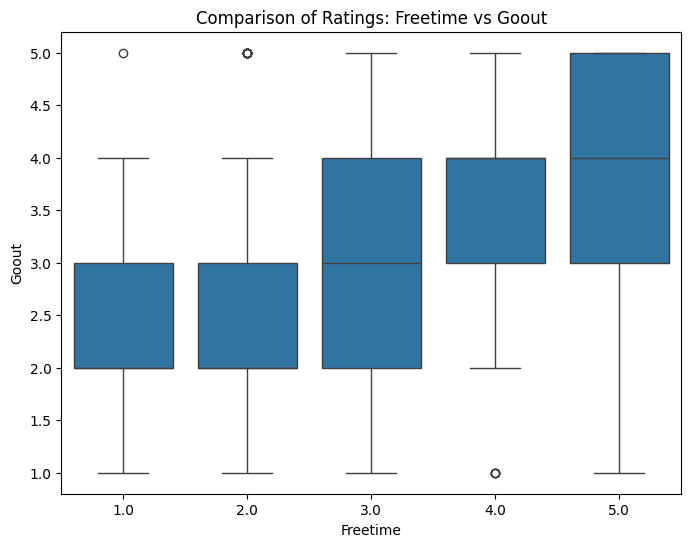

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='freetime', y='goout', data=df)
plt.title('Comparison of Ratings: Freetime vs Goout')
plt.ylabel('Goout')
plt.xlabel('Freetime')
plt.show()

 #### Why Boxplot?
  The data is categorical (freetime/goout) with numerical ordinal ratings, and boxplots summarize and compare these distributions clearly and simply, especially when the dataset is large and focus on medians, spread, and outliers

####  Interpretation

- As Freetime increases, the median Goout rating rises from 3 to 4.

- The range of Goout also broadens, especially at higher levels of Freetime.

- Low Freetime (1–2) is associated with moderate and limited social activity, while high Freetime (4–5) shows frequent going out and greater variation in social behavior.

- Freetime = 4 and 5 show a clear jump in social activity, suggesting that people need a certain threshold of free time to engage more socially.

- Outliers in both high and low directions suggest personal preferences (e.g., introversion, academic pressure) may override available time in some cases.

**Summary**

The data shows a clear trend—students with more freetime generally tend to go out more, indicating stronger social habits. As freetime increases from 1 to 5, not only does the median goout score rise, but the range also becomes wider, reflecting more flexible and diverse social behavior. This suggests that having more leisure time enables students to engage more in social activities and develop better interpersonal connections.

#### Q4: Does living lifestyle affects student's academic performance?

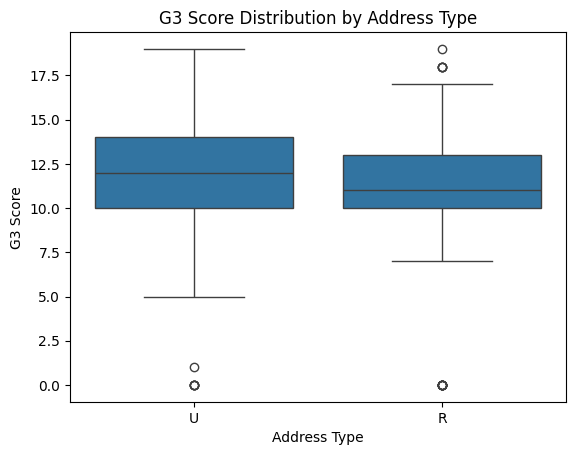

In [22]:

sns.boxplot(x='address', y='G3', data=df)
plt.title("G3 Score Distribution by Address Type")
plt.xlabel("Address Type")
plt.ylabel("G3 Score")
plt.show()

#### Why boxplot?
A box plot is appropriate because it effectively summarizes the distribution, central tendency (median), and spread of numerical data across the Urban and Rural categories, allowing clear visual comparison between the two groups.

#### Interpretation

- **Sample Size**: Urban group (n = number_U), Rural group (n = number_R).

- **Median Scores**: Urban students have a higher median G3 score than Rural students, indicating generally better academic performance.

- **Score Range & Spread**: Urban scores cover a wider range (approx. 5 to 19), showing more variability; Rural scores are more concentrated but exhibit more extreme outliers on both low and high ends.

- **Outliers**: Both groups have low-score outliers near zero, while Rural students have more high-score outliers, suggesting a few exceptional rural performers.

- **Skewness**: Urban scores are slightly left-skewed, indicating many students score above the median; Rural scores are more symmetric but centered at a lower level.

**Summary**

The differences in academic performance between Urban and Rural students highlight disparities in access to quality education, resources, and support. Urban students generally benefit from better educational environments, leading to higher scores, while Rural students face challenges that can limit their performance. Overall, the living environment significantly influences academic outcomes, although some Rural students still achieve high scores despite these obstacles.





#### Q5: Does travel time reduce a student’s free time?

why: Travel time may reduce free time because longer commutes leave less time for leisure, cause fatigue, limit scheduling, and studies often show they’re linked.


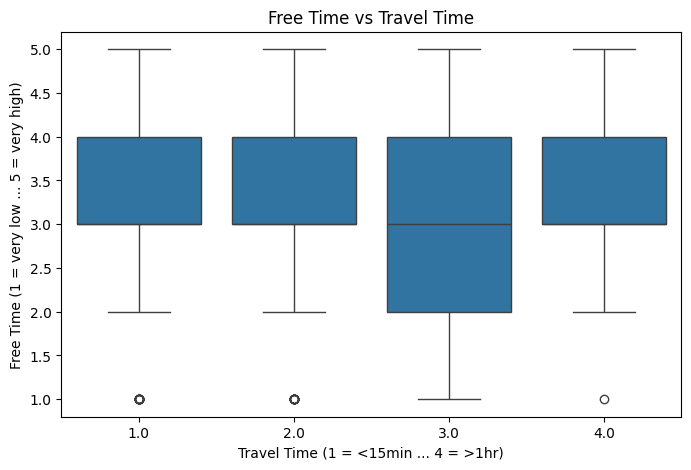

In [23]:


plt.figure(figsize=(8, 5))
sns.boxplot(x='traveltime', y='freetime', data=df)
plt.title("Free Time vs Travel Time")
plt.xlabel("Travel Time (1 = <15min ... 4 = >1hr)")
plt.ylabel("Free Time (1 = very low ... 5 = very high)")
plt.show()




### Interpretation

**By plot**(Grouped by Travel Time)

 **Travel Time = 1 (<15 min)**
- **Median Free Time**: ~4
- **Interquartile Range (IQR)**: 3–4
- **Outliers**: A few students with free time = 1
- **Conclusion**: Students living closest to school have consistently higher free time.

**Travel Time = 2 (15–30 min)**
- **Median Free Time**: Slightly lower than Group 1 but still ~3.5–4
- **IQR**: Similar to Travel Time = 1
- **Outliers**: Few, mostly low (free time = 1)
- **Conclusion**: A modest commute doesn't impact free time significantly.

 **Travel Time = 3 (30 min – 1 hour)**
- **Median Free Time**: Drops to ~3
- **IQR**: Widens to span from 2 to 4.5
- **Outliers**: Noticeable number with free time = 1
- **Conclusion**: This group experiences the most variability — travel likely cuts into available free time.

**Travel Time = 4 (>1 hour)**
- **Median Free Time**: Back up to ~4
- **IQR**: Wide again, but fewer extremely low values
- **Conclusion**: Despite long travel, many students maintain high free time  perhaps due to lifestyle adjustments or sample size effects.

**Final Summary**

| Travel Time | Free Time Impact       | Notes |


| 1           | High & consistent      | Very few low values |

| 2           | Slightly lower but stable | Still balanced |

| 3           | Variable, more low outliers | Disruption due to moderate commute |

| 4           | Surprisingly high again | Possible compensation mechanisms |



**General Possible Reasons**(For students with high travel time still having high free time)

1. **Efficient Time Management**: Students with long travel may plan better.
2. **Parental Support**: Less burden of chores, more structured schedules.
3. **School-Centric Routines**: Students stay back to finish work at school.
4. **Sample Size Effect**: Fewer long-commute students may skew median upward.

**Conclusion:**

Free time generally decreases as commute increases, especially at moderate travel times. However, those with the longest commute often show surprising resilience, suggesting compensatory behaviors or contextual factors. This suggests that travel time may not be a strong limiting factor for students' personal or leisure time.






## Level 4: Relationship Prediction Model

 Objective

 Apply classification techniques to model relationship likelihood and assess their
performance. Think critically about what the models reveal, and what they don’t.

Here, I considered three models - logistic regression, random forest and naive bayes as the target variable was dichotomous.

After evaluating the performance I found that logistic regression was best suitable for this problem statement.
The goal was to predict and understand the feature influence on romantic relationship.
Naive bayes assumes feautre independence which is why it was not suitable. Logistic regression provides coefficients which helps explain which factors increase or decrease the likelihood of being in a relationship.

It is often used as a benchmark model in binary classification due to reliable performance. A random forest model often has a risk of overfitting and requires pruning. It also has a slow training speed and low interpretability.


Following code shows a logistic regression model, with extra optimizations using hyper parameter tuning.



CV Accuracy (Logistic Regression): 0.5406678592725104


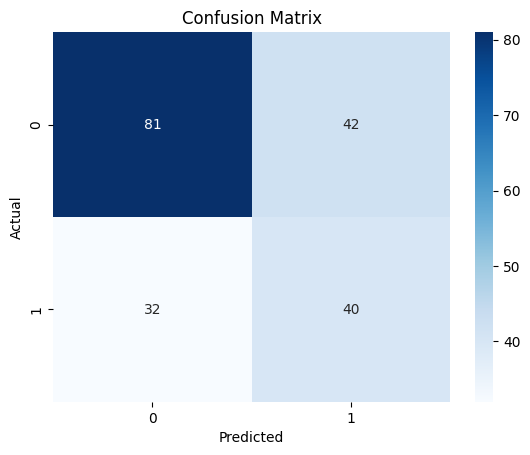


CV Accuracy (Logistic Regression): 0.5406678592725104
🔹 Logistic Regression Accuracy: 0.6205128205128205
🔹 Logistic Regression AUC: 0.6536246612466124

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       123
           1       0.49      0.56      0.52        72

    accuracy                           0.62       195
   macro avg       0.60      0.61      0.60       195
weighted avg       0.63      0.62      0.62       195


ROC-AUC Score: 0.6536246612466124


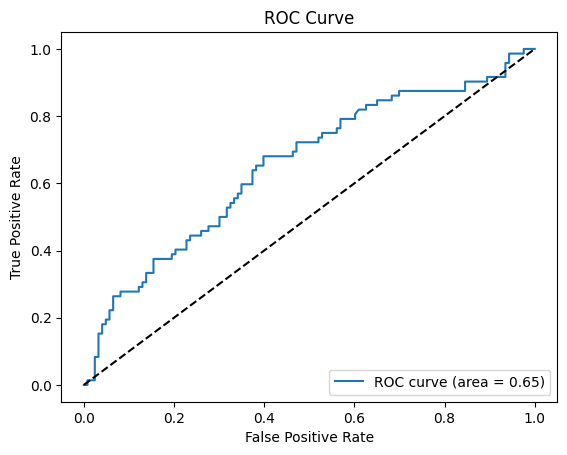


Top 10 Predictive Features:
                Coefficient
guardian_other     0.123151
Feature_2          0.111948
Feature_1          0.104740
school_MS          0.054255
G1                -0.049385
G2                -0.070446
Mjob_services     -0.079284
higher_yes        -0.110380
schoolsup_yes     -0.119281
sex_M             -0.155103


In [24]:
# Relationship Prediction Model (Improved Version)
# Step-by-step Jupyter Notebook with Advanced Models and Tuning

# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


#  Data Preprocessing
# Drop rows with missing target (if any)
df = df.dropna(subset=['romantic'])


# Encode categorical features
label_enc = LabelEncoder()
df['romantic'] = label_enc.fit_transform(df['romantic'])  # yes=1, no=0

# Encode all other categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'romantic' in cat_cols:
    cat_cols.remove('romantic')
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Feature and Target Split
X = df.drop('romantic', axis=1)
y = df['romantic']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Logistic Regression Model with Hyperparameter Tuning
pipe_lr = ImbPipeline([
     ('smote', SMOTE(random_state=42)),
     ('scale', StandardScaler()),
     ('select', SelectKBest(score_func=f_classif, k='all')),
     ('clf', LogisticRegression(max_iter=1000))
     ])
#Define hyperparameters using parameter grid
param_grid_lr = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear'],
    'select__k': [10, 20, 'all']
}
#Stratified K-fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#GridSearchCV for best combinations
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv_strategy, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# Evaluate
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

#  Cross-Validation Scores
cv_scores_lr = cross_val_score(best_lr, X_scaled, y, cv=5)

print("\nCV Accuracy (Logistic Regression):", np.mean(cv_scores_lr))

# Get model & selected features
lr_model = best_lr.named_steps['clf']
selector = best_lr.named_steps['select']
scaler = best_lr.named_steps['scale']

# Get selected features
selected_mask = selector.get_support()
X_selected = X.iloc[:, selected_mask]
X_scaled = scaler.fit_transform(X_selected)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nCV Accuracy (Logistic Regression):", np.mean(cv_scores_lr))
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("🔹 Logistic Regression AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_lr)
print("\nROC-AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



#Coefficients/Feature Importance
coefficients = pd.DataFrame(lr_model.coef_[0], index=X_selected.columns, columns=['Coefficient'])

coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nTop 10 Predictive Features:")
print(coefficients.head(10))

## Summary

**Importing necessary libraries**

**Data preprocessing**
Categorical data was encoded and complete dataset was split into features and target varaible

After that the data was standardized using StandardScaler() to preserve gaussian distribution.

**Data split**

Data was split for training and testing in a ratio of 70:30 respectively.

- **Logistic regression  model**

**Pipelining**
Pipeleining was used to build the model
This pipeline consists of the following steps:

1. SMOTE(random_state=42)
SMOTE = Synthetic Minority Over-sampling Technique.

Handles class imbalance by generating synthetic examples for the minority class.

Ensures the logistic regression model is not biased toward the majority class.

2. StandardScaler()
Standardizes features to have mean = 0 and standard deviation = 1.

Essential for algorithms like Logistic Regression that are sensitive to feature scaling.

3. SelectKBest(score_func=f_classif, k='all')
Feature selection method that selects the top k features based on univariate statistical tests.

f_classif uses ANOVA F-values to rank features.

k='all' means all features are passed (this step still helps in scoring for feature importance).

4. LogisticRegression(max_iter=1000)
The actual classification model.

max_iter=1000 increases the maximum number of iterations to ensure the model converges during training.

This pipeline ensures robust preprocessing, feature selection, and model fitting in a single, clean workflow.

You can now use GridSearchCV or RandomizedSearchCV to perform hyperparameter tuning on this pipeline (e.g., tuning C, penalty, etc. in LogisticRegression).
#Parameter grid
To optimize the model, parameter grid was used.
Machine learning models have hyperparameters—settings that control the learning process but are not learned from the data.
A parameter grid defines a set of values for these hyperparameters to try out systematically. Using tools like GridSearchCV, we train the model multiple times with all possible combinations of these values and select the best combination based on a performance metric (e.g., accuracy, AUC). This approach ensures that the model is optimally tuned rather than relying on default or arbitrary settings, improving both accuracy and generalization.


'clf__C': [0.001, 0.01, 0.1, 1, 10]
Controls regularization strength (inverse of regularization parameter). Smaller values mean stronger regularization, which can reduce overfitting by penalizing large coefficients.

'clf__penalty': ['l2']
Uses L2 regularization (Ridge), which encourages smaller coefficients and stabilizes the model.

'clf__solver': ['lbfgs', 'liblinear']
Specifies the algorithm to optimize the logistic regression. 'lbfgs' is efficient for larger datasets and supports multinomial loss, while 'liblinear' works well for smaller datasets.

'select__k': [10, 20, 'all']
Refers to feature selection using SelectKBest, which picks the top k features based on univariate statistical tests. Testing different values helps find the best number of features that improve model accuracy.


- **Stratified k fold**

Stratified K-Fold is a cross-validation technique that splits the dataset into k folds (here, 5 folds) while preserving the proportion of each class (e.g., positive and negative examples) in every fold. This is important in classification problems, especially when classes are imbalanced, to ensure each fold fairly represents the overall class distribution.
Using shuffle=True ensures the data is mixed before splitting, and setting a random_state makes the splits reproducible.

**GridSearchCV with Stratified K-Fold**

GridSearchCV performs an exhaustive search over the hyperparameter grid using the cross-validation strategy defined above (cv_strategy). It trains and evaluates the model on multiple train-test splits for each combination of hyperparameters and selects the best model based on the scoring metric (here, accuracy). This helps find the optimal hyperparameters for the model.

**Model Fitting and Evaluation**

The best model (best_lr) found by GridSearchCV is then trained on the full training set and evaluated on the test set. Predictions (y_pred_lr) and predicted probabilities (y_prob_lr) for the test set are generated to assess performance using various metrics later.

**Cross-Validation Scores on Full Dataset**

Finally, cross_val_score runs the best logistic regression model using 5-fold cross-validation on the entire dataset (scaled features and labels). It provides an average accuracy score across folds, giving estimate of the model’s performance and generalization capability.

**Confusion Matrix and Metrics Explanation**

The confusion matrix is a table used to evaluate the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives. We use confusion_matrix(y_test, y_pred_lr) to generate this table by comparing the actual labels (y_test) with the predicted labels (y_pred_lr). The heatmap visualization using seaborn makes it easy to interpret the matrix visually, highlighting where the model is getting predictions right or wrong.

Following that, several key evaluation metrics are printed:

Accuracy measures the overall proportion of correct predictions (both positive and negative).

AUC (Area Under the ROC Curve) summarizes the model’s ability to distinguish between classes across all thresholds — a higher value (close to 1) means better performance.

The classification report provides detailed precision, recall, and F1-score for each class, which gives deeper insight into how well the model performs on positives and negatives separately.


**ROC Curve and AUC Plot**

The ROC (Receiver Operating Characteristic) curve plots the trade-off between the True Positive Rate (Recall) and False Positive Rate at various classification thresholds. Using predicted probabilities (y_prob_lr), roc_curve() calculates these values, and plotting them helps visualize the model's discriminatory power.

The diagonal dashed line represents a random classifier, so curves above this line indicate better-than-random performance. The AUC score quantifies this curve into a single number; closer to 1 indicates excellent classification capability.

Plotting the ROC curve is essential because it shows how well the model can separate classes regardless of the chosen threshold, which is especially useful in imbalanced datasets or when you care about precision-recall trade-offs.


**Coefficients / Feature Importance Explanation**

In logistic regression, the coefficients represent the strength and direction of the relationship between each feature and the target variable. The code extracts these coefficients from the trained model (model.coef_[0]) and creates a DataFrame that maps each coefficient to its corresponding feature name (X.columns).

By sorting the coefficients in descending order, we identify the features that have the greatest positive impact on predicting the target (romantic in this case). Positive coefficients indicate that as the feature value increases, the likelihood of the positive class (e.g., "romantic = yes") increases, while negative coefficients suggest the opposite.

Printing the top 10 predictive features helps understand which variables the model considers most important for making predictions, giving valuable insights into the data and supporting interpretability of the model’s decisions.






## LEVEL - 5  Model Reasoning & Interpretation

Objective:
- For each classifier, visualize decision boundaries using 2D feature pairs (choose any two
meaningful features)

Use SHAP to :
 - Plot global feature importance
 - Generate local explanations for two students one predicted “Yes” and one “No
 - Interpret the results in plain language: what really drives relationship prediction?

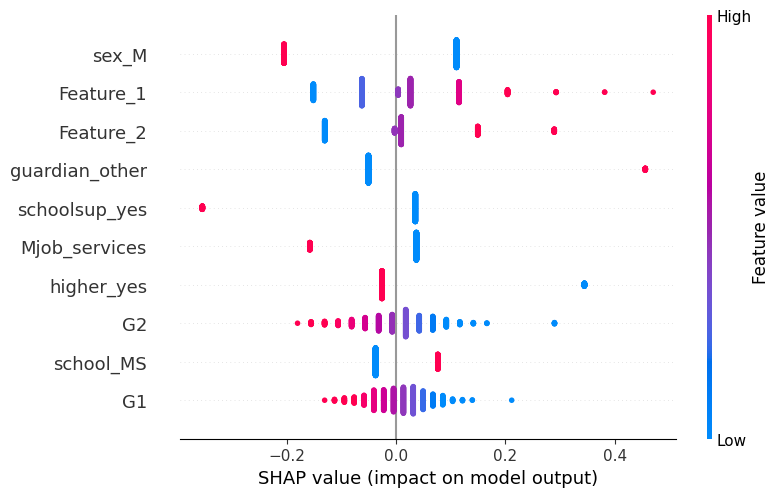

In [25]:
import shap
shap.initjs()
# Convert scaled & selected test set to DataFrame for SHAP
X_test_selected = pd.DataFrame(X_scaled, columns=X_selected.columns)

# Refit the model on full data (optional, or just use train)
explainer = shap.Explainer(best_lr.named_steps['clf'], X_test_selected)
shap_values = explainer(X_test_selected)

# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=15)



**BEESWARM PLOT**
A SHAP (SHapley Additive exPlanations) beeswarm plot shows:

Which features matter most

How they affect the output

How each feature's value (high/low) impacts the prediction

1. Top Features:
sex_M, Feature_1, Feature_2 are the most impactful on the model output.

The longer the spread on the x-axis, the greater the influence.

2. Example - sex_M:
Red points (high value = male) are pushing predictions right (positive SHAP → higher likelihood of the class).

So: Being male increases the predicted probability of the target class.

3. Feature_1 and Feature_2:
Blue values (low) mostly push the prediction negatively, red (high) push it positively → these may be continuous features where higher values increase the output.

4. G1 and G2 (grades):
Most values are around 0 → moderate importance.

But some red dots on the right → High G1/G2 → push prediction higher (possibly related to "yes" in romantic or another target).

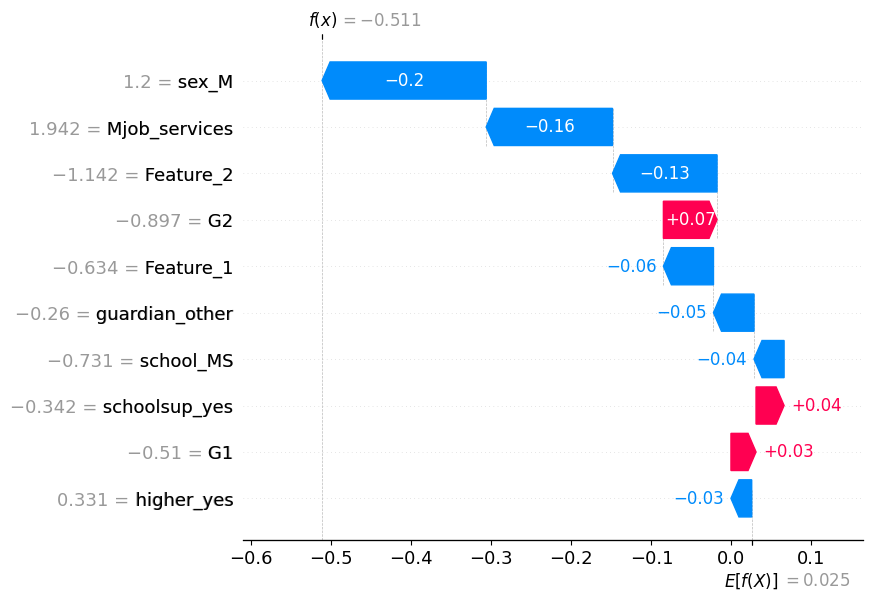

In [30]:
shap.plots.waterfall(shap_values[200])

**WATERFALL PLOT**

A SHAP waterfall plot breaks down the prediction for one instance (sample) by showing how each feature pushes the model’s base value (average prediction) up or down to reach the final prediction

Element	Meaning
E[f(x)]=0.025	The base value: average model output over all training samples

f(x)=−0.511	The final prediction for this specific input instance
Bars	Each bar shows how much a feature pushes the prediction up or down from the base value


sex_M = 1.2	feature value = -0.20	SHAP contribution = Strong negative	Effect = Decreases prediction significantly

Mjob_services = 1.942	Feature value = -0.16	SHAP contribution = Strong negative	Effect = Decreases prediction significantly

Feature_2 = -1.142	feauture value = -0.13	SHAP contribution = Moderate negative	 Effect = Decreases prediction

G2 = -0.897	feauture value = +0.07 SHAP contribution =	Moderate positive   Effect =	Increases prediction

Feature_1 = -0.634 feauture value = -0.06  SHAP contribution = 	Slight negative	  Effect = Decreases prediction

guardian_other = -0.26 feauture value =	-0.05	 SHAP contribution = Slight negative	Effect =  Decreases prediction


school_MS = -0.731	feauture value = -0.04	 SHAP contribution = Slight negative	Effect = Decreases prediction


schoolsup_yes = -0.342	feauture value = +0.04 SHAP contribution = 	Small positive	Effect = Increases prediction


G1 = -0.51	feauture value = +0.03	SHAP contribution = Small positive	Effect = Increases prediction

higher_yes = 0.331	feauture value = -0.03	SHAP contribution = Slight negative Effect =	Decreases prediction


So in this case:
The model starts at 0.025
Adds positive contributions (from G2, schoolsup_yes, G1)
Subtracts large negative effects (sex_M, Mjob_services, Feature_2, etc.)
And arrives at a final prediction of -0.511
To summarize -

| Insight                      | Meaning                              |
| ---------------------------- | ------------------------------------ |
| **Top positive contributor** |G2 (+0.07), schoolsup_yes (+0.04), and G1 (+0.03)                         |
| **Top negative contributor** | sex_M (–0.20), Mjob_services (–0.16), and Feature_2 (–0.13)             |
| **Prediction pushed up**     | Mostly by G2, schoolsup_yes, and G1 |
| **Prediction pushed down**   | Mainly by sex_M, Mjob_services, and Feature_2             |




In [ ]:
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")

**SUMMARY PLOT**

This is a global interpretability plot that answers the question:

"Which features had the biggest average impact on the model’s predictions?"


Insights

sex_M dominates: Being male or female is a strong differentiator in the model.

Custom features (Feature_1, Feature_2) are playing an important role — likely derived from meaningful combinations or transformations.

Parental, academic, and socio-economic features (like guardian, Mjob_services, schoolsup, etc.) are strongly shaping predictions.



In [ ]:
shap.plots.violin(shap_values)


**VIOLIN PLOT**
A violin plot is a method of plotting numeric data and can be understood as a combination of a box plot and a kernel density plot.

It shows the distribution of the data across different categories.

The width of the violin at any point represents the density (frequency) of the data points at that value.

In your plot, the horizontal axis represents SHAP values (impact on model output), and the vertical axis shows different features.

#Violin Plot in SHAP Analysis Context

SHAP values quantify the contribution of each feature to the prediction for a specific data instance.

Positive SHAP values push the prediction higher (e.g., towards class 1), negative SHAP values push it lower (e.g., towards class 0).

Each "violin" represents the distribution of SHAP values for one feature across many data points.

The color gradient (from blue to pink/red) shows the feature value from low to high.

**Importance of the Violin Plot for Model Interpretation**
Distribution Insight:
You can see the spread and density of SHAP values for each feature, not just the average effect. This helps understand the variability in feature impact.

**Feature Impact Direction:**

If a feature's SHAP values are mostly on the positive side, it tends to increase the prediction.

If mostly on the negative side, it tends to decrease the prediction.

#Relationship Between Feature Value and Effect:
The color shows how feature value corresponds with impact. For example:

If high feature values (pink) align with positive SHAP values, the feature's higher values increase the prediction.

Conversely, if high values align with negative SHAP values, higher feature values decrease the prediction.

Interpretation of Your Specific Plot
Feature names on the left: sex_M, Feature_1, Feature_2, etc.

SHAP value on X-axis: Impact on model output (positive or negative).

Colors: Blue = low feature value, Pink = high feature value.

**Examples from the plot:**
sex_M:
High values (pink) have negative SHAP values, so being male (if sex_M=1 means male) pushes prediction lower. Low values (blue) push the prediction higher.

Feature_1:
High values (pink) push predictions positively, low values negatively.

Feature_2:
Mostly, low feature values (blue) have positive SHAP values; high values tend to have a negative or neutral effect.

higher_yes:
High values (pink) mostly have a negative SHAP value, so this feature's high presence reduces the prediction.

G2 and G1 (likely grades):
These show wider spread but generally positive SHAP values for higher feature values (pink).

**Summary**
Violin plots in SHAP analysis are powerful for understanding both the magnitude and direction of feature effects.

They allow spotting non-linear or complex relationships between features and model predictions.

This helps in validating the model, explaining predictions, and identifying important features.

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[0:5].values, X_selected.iloc[0:5])


**DECISION PLOT**

A SHAP Decision Plot shows the cumulative effect of each feature on the model’s prediction for one or more samples (observations). It is part of the SHAP (SHapley Additive exPlanations) framework and is useful for explaining predictions of any machine learning model.

#Components of the Plot:
X-axis (Model output value):

Represents the model’s predicted value (e.g., log-odds, probability, regression score).

Starts from a base value (typically the average prediction over the dataset) and moves towards the actual prediction.

The horizontal movement indicates how much each feature contributed to the final prediction.

Y-axis (Features):

Lists features in the order of their importance (from top to bottom).

Features that contributed most are at the top.

Colored Lines:

Each line represents a sample/observation.

The color represents the feature value (e.g., blue = low, red = high, or 0/1 for binary features).

Sharp movements along the x-axis show strong contributions of a feature to the model output.

Base Value (intercept):

The vertical gray line at x = 0 is typically the expected value of the model output.
**Importance of SHAP Decision Plot:**
Transparency: Helps understand how a model arrived at a particular decision.

Debugging: Identify unusual or incorrect behavior in predictions.

Trust & Accountability: Useful in high-stakes domains like finance or healthcare to justify decisions.

Feature Interaction: Shows how combinations of features affect decisions.

Comparison: Easily compare the influence of different features on multiple instances.

**Interpretation Example from derived Plot:**
Let’s walk through the plot you provided:

Top Feature – schoolsup_yes:

For one sample (blue line), this feature had a strong negative contribution to the prediction (moved left toward -0.4).

For another (pink line), it had a small positive contribution.

Feature sex_M:

Strongly reduced the prediction for the blue line (indicating male sex lowered the prediction in that case).

Feature_1, G1, guardian_other etc.

**Summary**

| Feature         | Interpretation                                                        |
| --------------- | --------------------------------------------------------------------- |
| `schoolsup_yes` | Negatively influences prediction (e.g., implies risk)                 |
| `sex_M`         | Can decrease prediction (e.g., males may have lower expected outcome) |
| `G1`, `G2`      | Likely grades that contribute positively to the predicted outcome     |



